<a href="https://colab.research.google.com/github/alisterjan/FPL/blob/main/FPL_API_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np

In [ ]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

We look specifically on elements, element_type, teams

## Building DataFrame

In [ ]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [ ]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1100,1160,1120,1140,1080,1100,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,2,None,False,0,1010,1020,1020,1030,1020,1030,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1100,1130,1150,1190,1100,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1060,1070,1040,1090,1040,1080,43


In [ ]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [ ]:
#Using map function:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
slim_elements_df.sort_values('value',ascending=False).head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
173,Chalobah,Chelsea,2,3.2,50,90,139080,2.8,14,Defender,2.8
150,Alonso,Chelsea,2,6.7,56,85,224079,2.7,15,Defender,2.7
498,Dennis,Watford,4,4.1,51,65,232214,2.4,12,Forward,2.4
79,Pinnock,Brentford,2,4.1,45,90,176024,2.4,11,Defender,2.4
237,Barbosa Pereira,Leicester,2,5.5,55,90,133537,2.2,12,Defender,2.2


Note: Value = Total Points/Cost

In [ ]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index().sort_values('value',ascending=False)

,position,value
3,Midfielder,0.289362
0,Defender,0.273684
1,Forward,0.253333
2,Goalkeeper,0.233898


Using Loc:

In [ ]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value>0]
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index().sort_values('value',ascending=False)

In [ ]:
pivot

,position,value
2,Goalkeeper,0.690000
0,Defender,0.609302
1,Forward,0.527778
3,Midfielder,0.527132


Now look at Teams:

In [ ]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index().sort_values('value',ascending=False)
team_pivot

,team,value
2,Brentford,1.021429
5,Chelsea,1.014286
16,Spurs,0.850000
9,Leicester,0.835714
10,Liverpool,0.792857
12,Man Utd,0.700000
18,West Ham,0.657143
7,Everton,0.614286
13,Newcastle,0.600000
17,Watford,0.592857


Using .hist()

In [ ]:
fwd_df = slim_elements_df.loc[slim_elements_df.position=='Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position=='Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position=='Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position=='Goalkeeper']

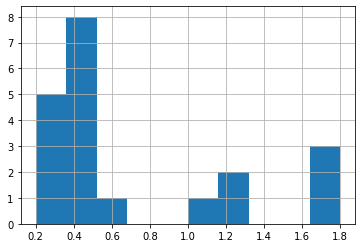

In [ ]:
goal_df.value.hist()

In [ ]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
230,Schmeichel,Leicester,1,19.8,50,90,131970,1.8,9,Goalkeeper,1.8
68,Raya Martin,Brentford,1,4.0,45,90,100895,1.8,8,Goalkeeper,1.8
441,Lloris,Spurs,1,4.9,55,90,47146,1.8,10,Goalkeeper,1.8
385,Woodman,Newcastle,1,0.5,45,90,13537,1.3,6,Goalkeeper,1.3
290,Ramses Becker,Liverpool,1,6.9,60,90,32750,1.2,7,Goalkeeper,1.2
171,Mendy,Chelsea,1,10.1,60,90,28567,1.0,6,Goalkeeper,1.0
554,Malheiro de Sá,Wolves,1,0.4,50,90,1746,0.6,3,Goalkeeper,0.6
210,Pickford,Everton,1,6.8,50,90,19548,0.4,2,Goalkeeper,0.4
177,Guaita,Crystal Palace,1,5.2,45,90,16297,0.4,2,Goalkeeper,0.4
36,Martínez,Aston Villa,1,32.6,55,90,22263,0.4,2,Goalkeeper,0.4


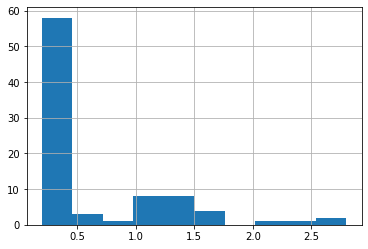

In [ ]:
def_df.value.hist()

In [ ]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
173,Chalobah,Chelsea,2,3.2,50,90,139080,2.8,14,Defender,2.8
150,Alonso,Chelsea,2,6.7,56,85,224079,2.7,15,Defender,2.7
79,Pinnock,Brentford,2,4.1,45,90,176024,2.4,11,Defender,2.4
237,Barbosa Pereira,Leicester,2,5.5,55,90,133537,2.2,12,Defender,2.2
449,Dier,Spurs,2,3.0,45,90,77006,1.6,7,Defender,1.6
249,Thomas,Leicester,2,1.1,45,90,43115,1.6,7,Defender,1.6
304,Tsimikas,Liverpool,2,27.2,41,90,318353,1.5,6,Defender,1.5
238,Amartey,Leicester,2,17.5,40,90,187003,1.5,6,Defender,1.5
458,Reguilón,Spurs,2,4.5,50,90,92933,1.4,7,Defender,1.4
161,Christensen,Chelsea,2,1.4,50,90,24151,1.4,7,Defender,1.4


In [ ]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
336,Pogba,Man Utd,3,14.7,76,74,576399,2.1,16,Midfielder,2.1
69,Canós,Brentford,3,2.9,55,90,141691,2.0,11,Midfielder,2.0
519,Benrahma,West Ham,3,11.4,61,87,301667,2.0,12,Midfielder,2.0
341,Borges Fernandes,Man Utd,3,58.1,121,90,418006,1.7,20,Midfielder,1.7
112,Mac Allister,Brighton,3,0.6,55,14,13568,1.6,9,Midfielder,1.6
65,Nørgaard,Brentford,3,1.2,50,90,56253,1.6,8,Midfielder,1.6
491,Sarr,Watford,3,5.5,60,90,152979,1.5,9,Midfielder,1.5
213,Doucouré,Everton,3,0.9,55,90,30711,1.5,8,Midfielder,1.5
375,Murphy,Newcastle,3,0.3,50,90,11414,1.4,7,Midfielder,1.4
338,Rodrigues de Paula Santos,Man Utd,3,0.8,50,90,30351,1.4,7,Midfielder,1.4


In [ ]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
498,Dennis,Watford,4,4.1,51,65,232214,2.4,12,Forward,2.4
513,Antonio,West Ham,4,28.9,76,90,354840,1.7,13,Forward,1.7
220,de Andrade,Everton,4,16.2,76,88,354344,1.4,11,Forward,1.4
503,Hernández Suárez,Watford,4,1.7,50,24,76570,1.2,6,Forward,1.2
438,Armstrong,Southampton,4,2.2,60,90,74339,1.0,6,Forward,1.0
59,Ings,Aston Villa,4,38.2,80,90,181580,0.9,7,Forward,0.9
217,Calvert-Lewin,Everton,4,13.3,81,90,204242,0.9,7,Forward,0.9
378,Saint-Maximin,Newcastle,4,5.9,65,90,90993,0.9,6,Forward,0.9
102,Maupay,Brighton,4,3.0,65,90,53450,0.8,5,Forward,0.8
287,Firmino,Liverpool,4,7.1,90,29,71043,0.8,7,Forward,0.8


Save it to CSV File:

In [ ]:
slim_elements_df.to_csv('fpl_players.csv')